In [58]:
%matplotlib inline

In [59]:
from forked_lib.parse_fm2 import parse_fm2
import pandas
import matplotlib.pyplot as plt
from operator import getitem
from functools import partial


In [4]:
with open("/home/peer/PycharmProjects/starman/movies/HL_SMBwarpless_V4.fm2") as movie_file:
    warpless = pandas.DataFrame.from_dict(parse_fm2(movie_file))


In [5]:
warpless.describe()

,A,B,DOWN,LEFT,RIGHT,SELECT,START,UP
count,67204,67204,67204,67204,67204,67204,67204,67204
unique,2,2,2,2,2,1,2,2
top,False,False,False,False,False,False,False,False
freq,58686,53132,66753,66044,55592,67204,67203,67203


In [6]:
warpless.iloc[67174]

A          True
B         False
DOWN      False
LEFT      False
RIGHT     False
SELECT    False
START     False
UP        False
Name: 67174, dtype: bool

In [7]:
button_order = list(warpless.iloc[1].index)
button_order

['A', 'B', 'DOWN', 'LEFT', 'RIGHT', 'SELECT', 'START', 'UP']

In [8]:
sum(warpless.iloc[67174].values * [2 ** i for i in range(8)])


1

In [9]:
button_weightings = [2 ** i for i in range(8)]
warpless_encoded = warpless.apply(axis=1, func=
lambda series: sum(series.values * button_weightings))


In [10]:
warpless_encoded.value_counts()

0      43029
18      8568
1       6326
2       3812
16      2207
3       1115
8        449
17       412
5        324
10       262
26       130
19       122
9        119
24       100
4         97
25        67
6         30
11        27
27         6
128        1
64         1
dtype: int64

In [11]:
def decode_action(action):
    readable = []
    for i in range(8):
        if action & 2**i:
            readable.append(button_order[i])
    return readable

In [12]:
decode_action(18)

['B', 'RIGHT']

In [13]:
decode_action(1)

['A']

In [14]:
decode_action(2)

In [95]:
action_readable_count = [("+".join(decode_action(encoded_action)), count) for encoded_action, count in warpless_encoded.value_counts().iteritems()]
action_readable_count[0]= ("NOOP",action_readable_count[0][1])


In [96]:
for a, b in action_readable_count:
    print("{};{}".format(a, b))


NOOP;43029
B+RIGHT;8568
A;6326
B;3812
RIGHT;2207
A+B;1115
LEFT;449
A+RIGHT;412
A+DOWN;324
B+LEFT;262
B+LEFT+RIGHT;130
A+B+RIGHT;122
A+LEFT;119
LEFT+RIGHT;100
DOWN;97
A+LEFT+RIGHT;67
B+DOWN;30
A+B+LEFT;27
A+B+LEFT+RIGHT;6
UP;1
START;1


In [97]:
sum(list(zip(*action_readable_count[14:]))[1])

In [113]:
get_second = partial(getitem, 1)
reduce_to = 7
action_readable_count_reduced = action_readable_count[:reduce_to] + \
                                [("%i Others" % (len(action_readable_count) - reduce_to), 
                                  sum(list(zip(*action_readable_count[reduce_to:]))[1]))]
action_readable_count_reduced


[('NOOP', 43029),
 ('B+RIGHT', 8568),
 ('A', 6326),
 ('B', 3812),
 ('RIGHT', 2207),
 ('A+B', 1115),
 ('LEFT', 449),
 ('14 Others', 1698)]

In [114]:
action_readable_count_df = pandas.DataFrame(action_readable_count_reduced)
action_readable_count_df

,0,1
0,NOOP,43029
1,B+RIGHT,8568
2,A,6326
3,B,3812
4,RIGHT,2207
5,A+B,1115
6,LEFT,449
7,14 Others,1698


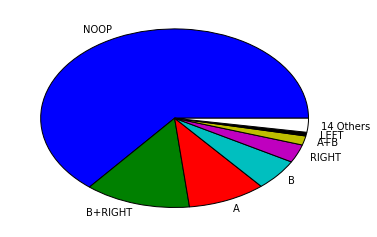

In [115]:
plt.pie(action_readable_count_df[1],labels=action_readable_count_df[0] )
plt.savefig("warpless_combo_count.pdf", bbox_inches='tight')